This Notebook implements a curve reconstruction algorithm in 2D. Given any input (points), it will construct a 2D curve which passes through every point.

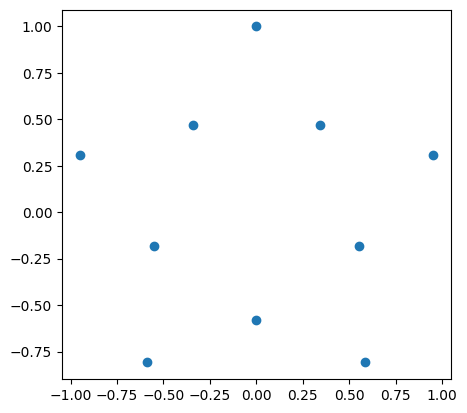

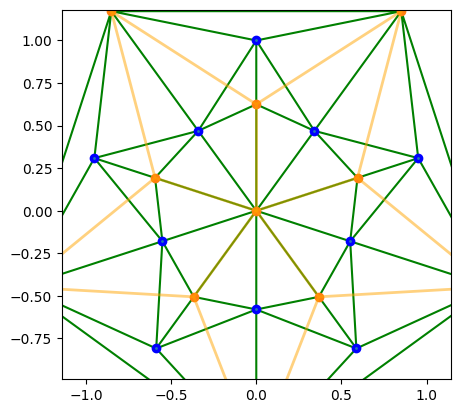

In [144]:
from math import sin, cos, pi
from matplotlib.patches import Polygon
from matplotlib.tri import Triangulation
import numpy as np
from scipy.spatial import Voronoi, Delaunay, voronoi_plot_2d
import matplotlib.pyplot as plt

# This will generate a star with any arbitrary number of points, using n_sides as a guide
n_sides = 5
start1 = pi/(2*n_sides)
start2 = pi/n_sides + pi/(2*n_sides)
# inner_size = 0.579
inner_size = 1 - (2.1 / n_sides) # Side note, WHY DOES THIS WORK???
points = np.array([(cos(start1 + 2*pi * i / n_sides), sin(start1 + 2*pi * i / n_sides)) for i in range(n_sides)] +
                  [(inner_size*cos(start2 + 2*pi * i / n_sides), inner_size*sin(start2 + 2*pi * i / n_sides)) for i in range(n_sides)])


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(points[:, 0], points[:, 1], 'o')
ax.set_aspect('equal')
plt.show()

vor = Voronoi(points)
all_points = np.concatenate((points, vor.vertices))
triangles = Delaunay(all_points)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.triplot(all_points[:, 0], all_points[:, 1], triangles.simplices, c="g")
ax.plot(points[:, 0], points[:, 1], 'o', c='b')
ax.set_aspect("equal")

fig = voronoi_plot_2d(vor, ax=ax, show_vertices=True, line_colors='orange',
                      line_width=2, line_alpha=0.5, point_size=2)


plt.show()

In [145]:
lines = []
for tri in triangles.simplices:
  for pt in tri:
    if pt < len(points):
      for pt2 in tri:
        if pt != pt2 and pt2 < len(points):
          lines.append([points[pt], points[pt2]])

print(lines)

[[array([-0.95105652,  0.30901699]), array([-0.34091545,  0.46922986])], [array([-0.34091545,  0.46922986]), array([-0.95105652,  0.30901699])], [array([-0.55161278, -0.17922986]), array([-0.95105652,  0.30901699])], [array([-0.95105652,  0.30901699]), array([-0.55161278, -0.17922986])], [array([-0.58778525, -0.80901699]), array([-0.55161278, -0.17922986])], [array([-0.55161278, -0.17922986]), array([-0.58778525, -0.80901699])], [array([-1.06544272e-16, -5.80000000e-01]), array([-0.58778525, -0.80901699])], [array([-0.58778525, -0.80901699]), array([-1.06544272e-16, -5.80000000e-01])], [array([ 0.58778525, -0.80901699]), array([-1.06544272e-16, -5.80000000e-01])], [array([-1.06544272e-16, -5.80000000e-01]), array([ 0.58778525, -0.80901699])], [array([-0.34091545,  0.46922986]), array([6.123234e-17, 1.000000e+00])], [array([6.123234e-17, 1.000000e+00]), array([-0.34091545,  0.46922986])], [array([ 0.55161278, -0.17922986]), array([ 0.58778525, -0.80901699])], [array([ 0.58778525, -0.809

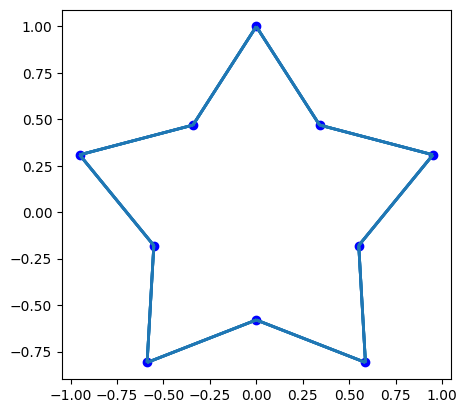

In [146]:
from matplotlib import collections  as mc
lc = mc.LineCollection(lines, linewidths=2)
fig, ax = plt.subplots()
ax.plot(points[:, 0], points[:, 1],  'o', c='b')
ax.add_collection(lc)
ax.set_aspect('equal')